In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
# Readig Data
data = pd.read_csv("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\benion-tree-hd-dataset-new.csv")
data.shape

(590, 5)

In [4]:
# Present Data in Table
data.head(10)

,PLOT NO,S/N,SPECIES,DIAMETER,HEIGHT
0,P1,1,Tectona grandis,28.6,13.7
1,P1,2,Gmelina arborea,34.7,16.3
2,P1,3,Senna siamea,46.1,18.5
3,P1,4,Senna siamea,22.0,9.3
4,P1,5,Senna siamea,25.8,11.0
5,P1,6,Senna siamea,24.5,10.5
6,P1,7,Gmelina arborea,50.9,18.9
7,P1,8,Senna siamea,25.1,11.0
8,P1,9,Senna siamea,22.9,10.4
9,P1,10,Senna siamea,27.1,13.0


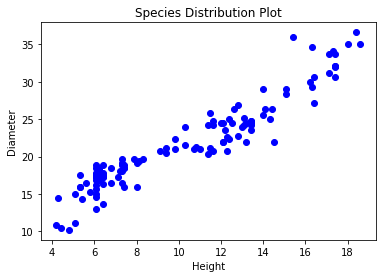

In [5]:
# Declaring Dependent and Independent Variables
X = data["HEIGHT"].values.reshape(-1, 1)
y = data["DIAMETER"].values.reshape(-1, 1)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# All Species Distribution Plot
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test.reshape(-1), color="blue")
plt.title("Species Distribution Plot")
plt.xlabel("Height")
plt.ylabel("Diameter")
plt.show()

In [6]:
# Frequencies and Species names
species = data["SPECIES"].values.reshape(-1, 1)
species_item = []
frequency = []
total = 0
for array in species:
    item = array[0]
    if item not in species_item:
        species_item.append(item)

for array in species_item:
    count = 0
    for index in species:
        item = index[0]
        if item == array:
            count += 1
    frequency.append(count)
    count = 0
for item in frequency:
    total += item
species_item.append("Total")
frequency.append(total)

# Unique list table
unique_data_frame = pd.DataFrame({"Species": species_item, "Frequency": frequency})
unique_data_frame

,Species,Frequency
0,Tectona grandis,46
1,Gmelina arborea,390
2,Senna siamea,18
3,Khaya senegalensis,19
4,Daniella olivera,58
5,Vitex doniana,10
6,Anthocleista djalonensis,17
7,Mangifera indica,1
8,Afzelia africana,8
9,Pterocarpus erinaceus,9


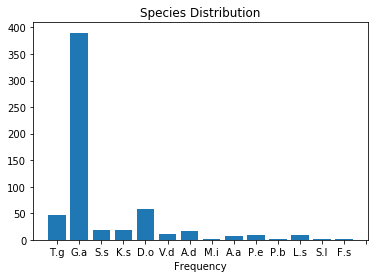

In [61]:
# Species distribution bar
items_array = []
for array in species:
    item = array[0].split(" ")[0][0] + "." + array[0].split(" ")[1][0]
    if item not in items_array:
        items_array.append(item)

# Plot bar
f, ax = plt.subplots()
plt.bar(items_array, frequency[0:len(frequency) - 1])
plt.title("Species Distribution")
plt.xlabel("Species")
plt.xlabel("Frequency")
ax.set_xticks(range(0, len(frequency)))
ax.set_xticklabels(items_array)
plt.show()

In [8]:
# Implement the Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Implement the Random Forest --> Random Forest Regressor and fit the data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Implement the Support Vector Machine --> Support Vector Regressor and fit the data
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_train)

# Make Prediction
lr_predictions = lr_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Predicted outcome table
data_frame = pd.DataFrame({"Actual(y)": y_test.flatten(), "LR-Predicted(y)": lr_predictions.flatten(), "SVR-Predicted(y)": svr_predictions.flatten(), "RF-Predicted(y)": rf_predictions.flatten()})
data_frame

C:\Users\benion\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\benion\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Actual(y),LR-Predicted(y),SVR-Predicted(y),RF-Predicted(y)
0,17.2,15.885148,17.099875,16.920408
1,22.3,20.902119,20.553526,19.551200
2,18.3,15.590032,16.807065,16.842163
3,24.2,23.263047,21.840466,21.059654
4,18.5,16.475380,17.688666,18.313417
...,...,...,...,...
113,18.8,17.213170,18.387400,18.444211
114,26.4,25.033743,23.326186,22.287975
115,36.6,33.592105,34.303245,37.533315
116,32.0,32.116525,32.200518,31.828397


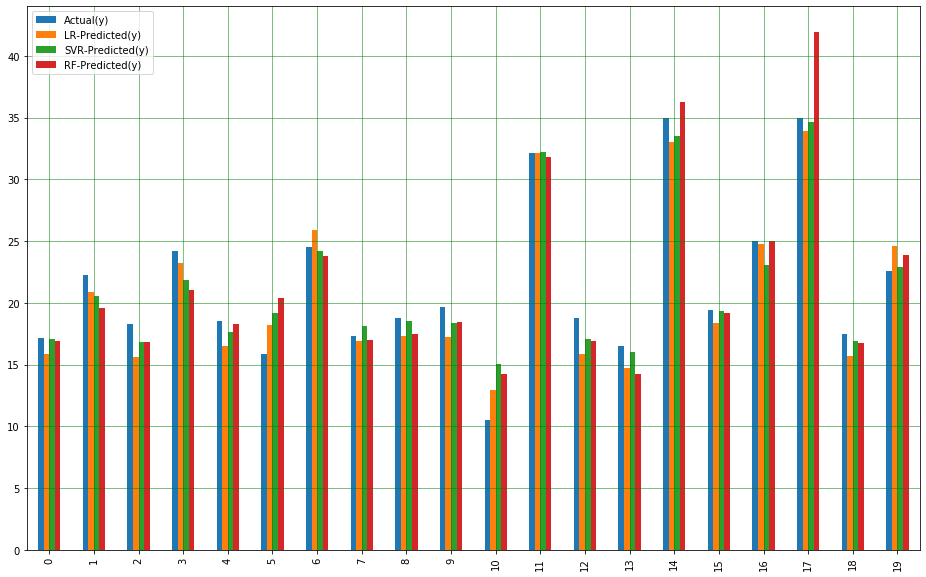

In [9]:
# Bar Graph
data_frame = pd.DataFrame({"Actual(y)": y_test.flatten(), "LR-Predicted(y)": lr_predictions.flatten(), "SVR-Predicted(y)": svr_predictions.flatten(), "RF-Predicted(y)": rf_predictions.flatten()})
data_frame_graph = data_frame.head(20)
data_frame_graph.plot(kind="bar", figsize=(16, 10))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="red")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="blue")
plt.show()

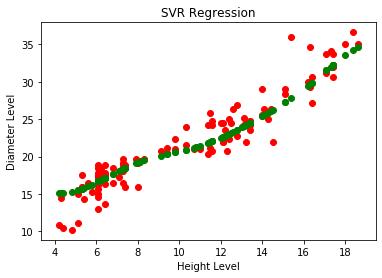

In [10]:
# SVR Plot
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test.reshape(-1), color="red")
plt.scatter(X_test, svr_predictions, color="green")
plt.title("SVR Regression")
plt.xlabel("Height Level")
plt.ylabel("Diameter Level")
plt.show()

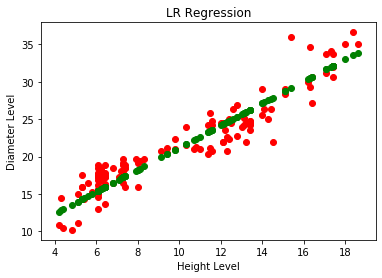

In [11]:
# LR Plot
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test.reshape(-1), color="red")
plt.scatter(X_test, lr_predictions, color="green")
plt.title("LR Regression")
plt.xlabel("Height Level")
plt.ylabel("Diameter Level")
plt.show()

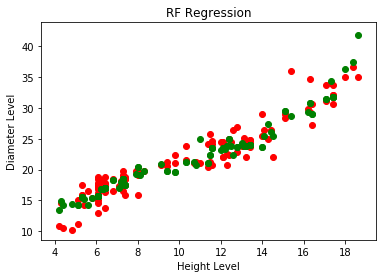

In [12]:
# RF Plot
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test.reshape(-1), color="red")
plt.scatter(X_test, rf_predictions, color="green")
plt.title("RF Regression")
plt.xlabel("Height Level")
plt.ylabel("Diameter Level")
plt.show()

In [13]:
# SVR
svr_mean_absolute_error = mean_absolute_error(y_test, svr_predictions)
svr_mean_squared_error = mean_squared_error(y_test, svr_predictions)
svr_root_mean_squared_error = np.sqrt(svr_mean_squared_error)
svr_r2_score = svr_model.score(X_train, y_train)
print(f"Mean Absolute Error: {svr_mean_absolute_error}")
print(f"Mean Squared Error: {svr_mean_squared_error}")
print(f"Root Mean Squared Error: {svr_root_mean_squared_error}")
print(f"r^2 Score: {svr_r2_score} -- ({svr_r2_score * 100})%")

Mean Absolute Error: 1.325065148893127
Mean Squared Error: 3.622627607299137
Root Mean Squared Error: 1.903320153652332
r^2 Score: 0.8508264418663652 -- (85.08264418663653)%


In [14]:
# LR
lr_mean_absolute_error = mean_absolute_error(y_test, lr_predictions)
lr_mean_squared_error = mean_squared_error(y_test, lr_predictions)
lr_root_mean_squared_error = np.sqrt(lr_mean_squared_error)
lr_r2_score = lr_model.score(X_train, y_train)
print(f"Mean Absolute Error: {lr_mean_absolute_error}")
print(f"Mean Squared Error: {lr_mean_squared_error}")
print(f"Root Mean Squared Error: {lr_root_mean_squared_error}")
print(f"r^2 Score: {lr_r2_score} -- ({lr_r2_score * 100})%")

Mean Absolute Error: 1.6230760951912375
Mean Squared Error: 3.9128995101944106
Root Mean Squared Error: 1.9781050301221144
r^2 Score: 0.8271449326302354 -- (82.71449326302354)%


In [15]:
# RF
rf_mean_absolute_error = mean_absolute_error(y_test, rf_predictions)
rf_mean_squared_error = mean_squared_error(y_test, rf_predictions)
rf_root_mean_squared_error = np.sqrt(rf_mean_squared_error)
rf_r2_score = rf_model.score(X_train, y_train)
print(f"Mean Absolute Error: {rf_mean_absolute_error}")
print(f"Mean Squared Error: {rf_mean_squared_error}")
print(f"Root Mean Squared Error: {rf_root_mean_squared_error}")
print(f"r^2 Score: {rf_r2_score} -- ({rf_r2_score * 100})%")

Mean Absolute Error: 1.483858347990243
Mean Squared Error: 4.071031110513211
Root Mean Squared Error: 2.017679635252636
r^2 Score: 0.9500045156292098 -- (95.00045156292099)%


In [16]:
# Model evaluation parameters
models = ['Linear Regression (LR)', 'Support Vector Regressor (SVR)', 'Random Forest Regressor (RF)']
mae = [lr_mean_absolute_error, svr_mean_absolute_error, rf_mean_absolute_error]
mse = [lr_mean_squared_error, svr_mean_squared_error, rf_mean_squared_error]
rmse = [lr_root_mean_squared_error, svr_root_mean_squared_error, rf_root_mean_squared_error]
rsquared = [lr_r2_score * 100, svr_r2_score * 100, rf_r2_score * 100]

# Model evaluation table
evaluation_data_frame = pd.DataFrame({"Models": models, "MAE": mae, "MSE": mse, "RMSE": rmse, "RSQUARED": rsquared})
evaluation_data_frame

,Models,MAE,MSE,RMSE,RSQUARED
0,Linear Regression (LR),1.623076,3.912900,1.978105,82.714493
1,Support Vector Regressor (SVR),1.325065,3.622628,1.903320,85.082644
2,Random Forest Regressor (RF),1.483858,4.071031,2.017680,95.000452
